In [249]:
import numpy as np
import pandas as pd

In [326]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import pca_modules as pm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)
importlib.reload(pm)

<module 'pca_modules' from '/home/jupyter/thesis/pca_modules.py'>

In [253]:
# set configuration
num_steps = 10
max_t = 50
t = np.linspace(max_t/num_steps, max_t, num_steps)

# classificatiom
test_size, cv = 0.5, 5
cv_config = [test_size, cv]

In [254]:
# reading data
train_data = pd.read_csv('graphwave_ac_train.csv')
test_data = pd.read_csv('graphwave_ac_test.csv')

In [255]:
ecf_df = dem.get_ecf(train_data, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,0.998825,0.996143,0.993620,0.992207,0.991692,0.991608,0.992044,0.993223,0.994566,0.994797,...,0.005146,0.004992,0.003929,0.002891,0.002001,0.001154,0.000838,0.001803,0.003923,B5_0
1,0.998991,0.996701,0.994677,0.993952,0.994406,0.995265,0.995990,0.996510,0.996733,0.996208,...,0.003874,0.003302,0.001915,0.000887,0.000676,0.001060,0.001807,0.002982,0.004506,B5_0
2,0.998892,0.996380,0.994114,0.993121,0.993232,0.993789,0.994525,0.995486,0.996306,0.996075,...,0.004458,0.004008,0.002690,0.001610,0.001090,0.000970,0.001367,0.002677,0.004760,B5_0


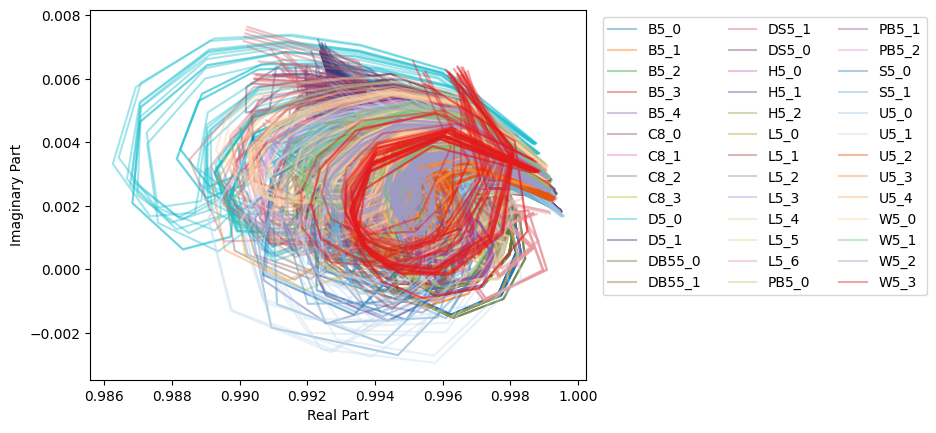

In [256]:
dem.get_ecf_plot(ecf_df,t)

In [291]:
num_steps_list = np.arange(1,31)
max_t_list = [50, 100, 150, 200, 250, 500]

In [293]:
res_svm = cm.cv_ecf(num_steps_list, max_t_list, test_data, train_data, cv_config, 1)

  0%|          | 0/30 [00:00<?, ?it/s]

In [292]:
res_lr = cm.cv_ecf(num_steps_list, max_t_list, test_data, train_data, cv_config, 2)

  0%|          | 0/30 [00:00<?, ?it/s]

In [334]:
res_svm.to_csv('results/ecf/res_svm.csv', index=False)
res_lr.to_csv('results/ecf/res_lr.csv', index=False)

In [335]:
num_steps_list = np.arange(1,31)
max_t_list = [50]
res_svm = cm.cv_ecf(num_steps_list, max_t_list, test_data, train_data, cv_config, 1)
res_lr = cm.cv_ecf(num_steps_list, max_t_list, test_data, train_data, cv_config, 2)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

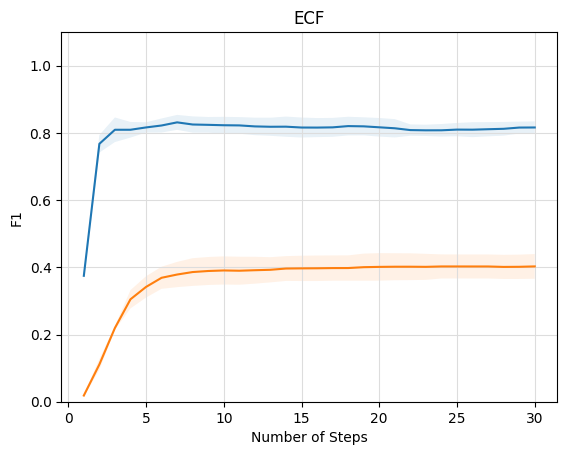

In [365]:
plot_cv_ecf(res_svm, res_lr)

In [364]:
def plot_cv_ecf(svm_result, lr_result):
    fig, ax = plt.subplots()
    plt.plot(svm_result['num_steps'].astype(int), svm_result['f1'].astype(float), label = 'svm')
    plt.gca().fill_between(svm_result['num_steps'].astype(int), 
                           [i-j for i,j in zip(svm_result['f1'].astype(float), svm_result['std'].astype(float))], 
                           [i+j for i,j in zip(svm_result['f1'].astype(float), svm_result['std'].astype(float))],
                           alpha=0.1)

        
    plt.plot(lr_result['num_steps'].astype(int), lr_result['f1'].astype(float), label = 'Logistic Regression')
    plt.gca().fill_between(lr_result['num_steps'].astype(int), 
                           [i-j for i,j in zip(lr_result['f1'].astype(float), lr_result['std'].astype(float))], 
                           [i+j for i,j in zip(lr_result['f1'].astype(float), lr_result['std'].astype(float))],
                           alpha=0.1) 
    plt.title('ECF')
    plt.xlabel('Number of Steps')
    plt.ylabel('F1')
    plt.ylim(0,1.1)
    plt.grid(color='#DDDDDD')
    plt.savefig('results/ecf/cv_ecf.png')

In [355]:
def plot_cv_ecf(clf_result):
    max_t = clf_result['max_t'].unique()
    fig, ax = plt.subplots()
    handles = []
    for i in max_t:
        df = clf_result.loc[clf_result['max_t'] == i]
        x = df['num_steps'].tolist()
        y = df['f1'].tolist()
        plt.plot(x, y, label = i, alpha = 0.7)
        plt.gca().fill_between(x,[i-j for i,j in zip(df['f1'], df['std'])], [i+j for i,j in zip(df['f1'], df['std'])], alpha=0.1) 
        ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Max t')
        plt.title('ECF')
        plt.xlabel('Number of Steps')
        plt.ylabel('F1')
        plt.ylim(0,1.1)
        plt.grid(color='#DDDDDD')
        plt.savefig('results/ecf/cv_ecf.png')


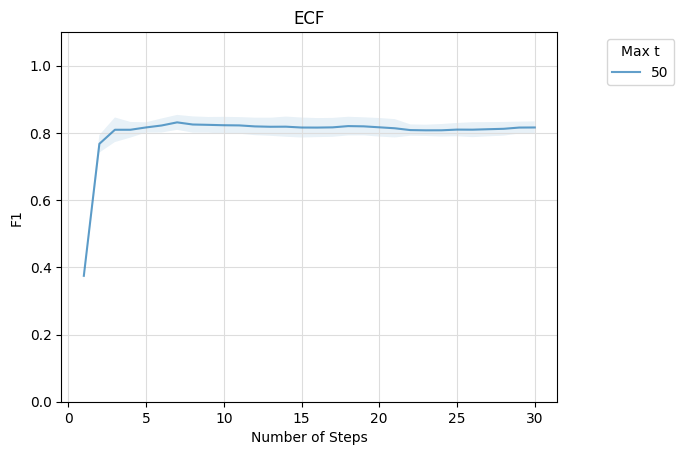

In [356]:
plot_cv_ecf(res_svm)

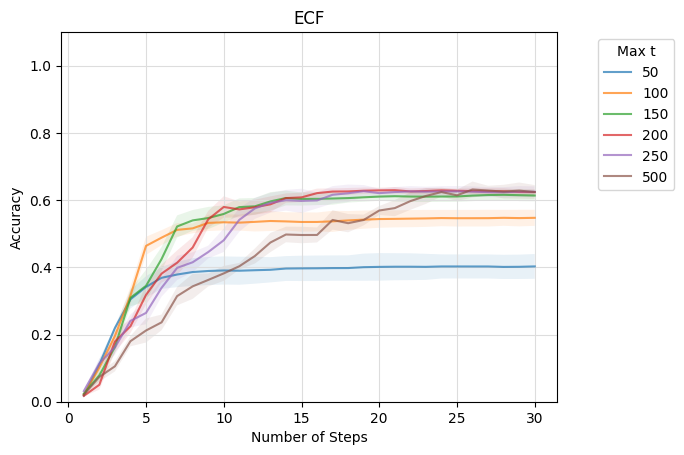

In [333]:
plot_cv_ecf(res_lr)

In [304]:
pca_res = pm.perform_pca(ecf_df, 5)

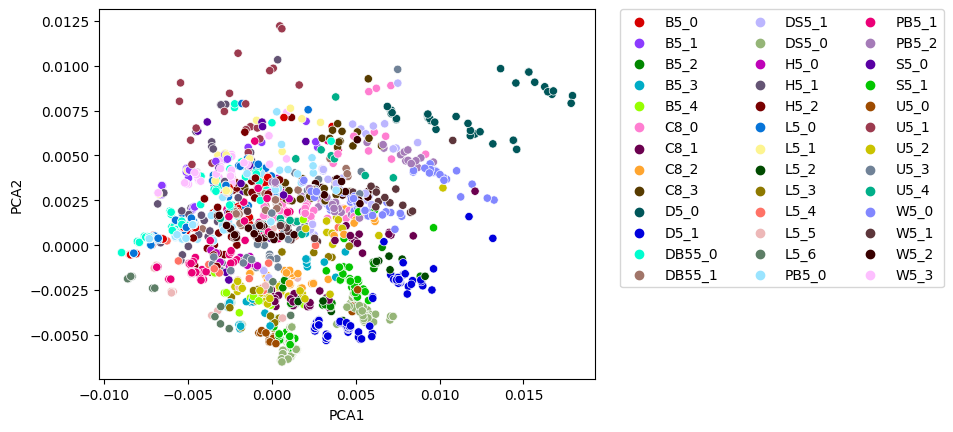

In [305]:
pm.plot_pca(pca_res, 'PCA1','PCA2', 39)